# Methode der kleinsten Quadrate

Im folgenden wollen wir die **Methode der kleinsten Quadrate (Least Squares)** näher beleuchten. Diese Methode wird oft benutzt, um eine Funktion $\lambda(x; \ $**$\phi$**$)$ mit den Funktionsparametern $\mathbf{\phi}$ an die gemessenen Punkte **$(x,y)$** anzupassen. Um jedoch die **Methode der kleinsten Quadrate** zu verstehen, wollen wir sie erst einmal anschaulich und halb-mathematisch herleiten. Dabei stüzen wir uns im Folgenden auf eine Herleitung aus dem Buch **"Statistical Data Analysis"**  von **Glen Cowan**.

Bevor wir dies jedoch tun, schauen wir uns das Problem des Fittens doch erst einmal anschaulich an. 

<figure class="image">
<img src="images/SketchLeastSquares.png"  alt="{{ Beispiel PDF }}" width=70%>
</figure>

Beim Fitten, zum Beispiel einer Geraden (lila) an eine Reihe von Messpunkten (schwarz), wollen wir den Abstand zwischen den einzelnen Messpunkten und der Geraden (orange) möglichst klein halten. Sprich die Summe über alle $\Delta Y_i$ 

$$\sum_i \Delta Y_i $$

sollte möglichst klein sein, wobei $\Delta Y_i$ durch 

$$ \Delta Y_i = y_i – f(x_i, \vec{\theta})$$

gegeben ist und $f(x, \vec{\theta})$ unsere Fitfunktion repräsentiert. Hierbei symbolisiert $\vec{\theta}$ die Parameter unserer Funktion. Sprich im Fall einer Geraden die Steigung $m$ und den Offset $y_0$ ($\vec{\theta}=(m, y_0)$). 

Darüber hinaus sollte die Richtung des Abstandes, sprich ob ein Messpunkt unterhalb oder oberhalb der Fitfunktion liegt, keine Rolle spielen. Daher quadrieren wir das Ganze und erhalten somit

$$ LS = \sum_i = (y_i – f(x_i, \theta))^2$$

Dies ist die allgemeinste Form der Methode der kleinsten Quadrate. Sie besagt, dass die Funktion, welche die Messpunkte am besten beschreibt, sprich die optimalen Werte für $\vec{\theta}$ aufweist, den Ausdruck LS minimiert. 

Nun weisen unsere Messpunkte nicht nur Werte für X und Y aus, sondern sind noch zusätzlich durch einen Messunsicherheit (Messfehler) charakterisiert. Diese sollten wir natürlich bei der Bestimmung unserer Parameter $\vec{\theta}$ berücksichtigen. Sprich Messwerte mit einer großen Unsicherheit sollten weniger stark berücksichtigt werden wie Messwerte mit einer kleinen Unsicherheit. Dies können wir gewährleisten, sofern wir die Distanzen $\Delta Y_i$ mit den jeweiligen Unsicherheiten $\Delta y_i$ gewichten, sprich  

$$ \chi^2 = \sum_i =\frac{(y_i – f(x_i, \theta))^2}{\Delta y_i^2}$$

berechnen. Das Quadrieren der Unsicherheiten sorgt dafür, dass der Ausdruck dimensionslos wird. Diese besondere Form der kleinsten Quadrate nennt man auch oft $\chi^2$-Fit. Wir werden später noch einmal genauer beleuchten warum. 

Nun wollen wir uns erst einmal ein Beispiel anschauen, wie dies in der Praxis aussieht. In der nachfolgenden Animation wird ein Ohm’schwer Widerstand an eine Reihe von Spannungs- und Strommessungen gefittet. Dies entspricht unserem obigen Geradenbeispiel. 
<figure class="image">
<img src="images/MaterialPythonkurs092018/Fitting_gif.gif"  alt="{{ Least Square Beispiel }}" width=100%>
</figure>

Wie die Animation zeigt, werden so lange verschiedene Widerstände ausprobiert, bis ein Wert gefunden wurde, bei dem das $\chi^2$ minimal wird. Dieses Variieren der Widerstandswerte passiert nicht zufällig, sondern basiert auf einem Algorithmus für Optimierungsverfahren. 

Es gibt verschiedene Arten von Algorithmen, um Minimierungsprobleme zu lösen. Wie diese genau aufgebaut sind, lernen Sie in anderen Programmierveranstaltungen, wie zum Beispiel *Programmieren für Physiker* oder *Computer in der Wissenschaft*. Zum Glück haben uns in Python bereits andere Menschen diese Arbeit abgenommen. Im folgenden wollen wir uns das package `iminuit` etwas genauer anschauen, welches bereits ein sehr umfangreiches und mächtiges Fittingtool darstellt. 

[iminuit](https://iminuit.readthedocs.io/en/stable/tutorials.html) verfügt auch über eine exzellente Dokumentation, mit Hilfe derer Sie auch komplexere Probleme lösen können.

Um mit Hilfe von `imnuit` etwas zu fitten brauchen wir zunächst einmal ein paar Messdaten und ein Fitmodel. Im Folgenden wollen wir die Entladekurve eines Kondensators mit der Kapazität $C$ über einen Widerstand $R$ bestimmen. Die Entladekurve ist durch eine einfache Exponentialfunktion der Form 

$$ I = I_0 \exp\{-t/RC\}$$

gegeben. Die Messdaten befinden sich in einer CSV-Datei im Ordner `data`. Die CSV-Datei kann mit Hilfe des `pandas` package eingelesen werden. [pandas](https://pandas.pydata.org/) ist ähnlich wie `numpy` ein package welches eine Fülle an Funktionen zum Verarbeiten und Verwalten von Daten bereitstellt. Es gehört ähnlich wie auch `numpy`, `scipy` und `matplotlib` zu den Standardbibliotheken, welche sehr häufig in der Wissenschaft verwendet werden. Aufgrund der zeitlichen Limitierung des Versuchstages können wir leider nicht auf alle Funktionen von `pandas` eingehen und wollen uns im Folgenden lediglich auf die Grundlagen beschränken. Für ihre zukünftigen Praktika lohnt es sich jedoch, noch mehr über `pandas` in Ihrer Eigenstudienzeit zu lernen.

CSV-Datein können wie folgt eingelesen werden

In [485]:
import pandas as pd

data_frame = pd.read_csv('data/discharge_data.csv')

Dabei gibt pandas die Daten als so genannten DataFrames zurück. Dies sind Objekte, welche ähnlich wie strukturierte `numpy.arrays` zu behandeln sind. DataFrames werden allgemein als Tabellen dargestellt.

In [486]:
data_frame

Unnamed: 0      time   current  delta_current  delta_time
0           0  0.000637  1.066538           0.05    0.000637
1           1  0.088553  0.406316           0.05    0.011447
2           2  0.194773  0.143093           0.05    0.005227
3           3  0.306413  0.078141           0.05    0.006413
4           4  0.405285  0.065042           0.05    0.005285
5           5  0.507390  0.011885           0.05    0.007390
6           6  0.613279 -0.018824           0.05    0.013279
7           7  0.707501  0.044513           0.05    0.007501
8           8  0.790479  0.006881           0.05    0.009521
9           9  0.883672 -0.019052           0.05    0.016328

Um die Daten aus einer bestimmente Spalte zu bekommen, können diese einfach mit dem Spaltennamen aufgerufen werden:

In [487]:
data_frame['time']

0    0.000637
1    0.088553
2    0.194773
3    0.306413
4    0.405285
5    0.507390
6    0.613279
7    0.707501
8    0.790479
9    0.883672
Name: time, dtype: float64

oder

In [488]:
data_frame['current']

0    1.066538
1    0.406316
2    0.143093
3    0.078141
4    0.065042
5    0.011885
6   -0.018824
7    0.044513
8    0.006881
9   -0.019052
Name: current, dtype: float64

Einzelne Messwerte lassen sich mit Hilfe von `.loc` bestimmen.

In [489]:
data_frame.loc[5, 'current']

0.0118852615051639

Sollten Sie eine Spalte von Messdaten in ein `numpy.array` umwandeln wollen, so können Sie dies wie folgt erreichen

In [490]:
data_frame['current'].values

array([ 1.06653795,  0.40631626,  0.1430927 ,  0.07814083,  0.06504185,
        0.01188526, -0.01882397,  0.04451315,  0.00688072, -0.01905164])

Die Messdaten können Sie auch wie gewohnt mit Hilfe von `matplotlib` darstellen.

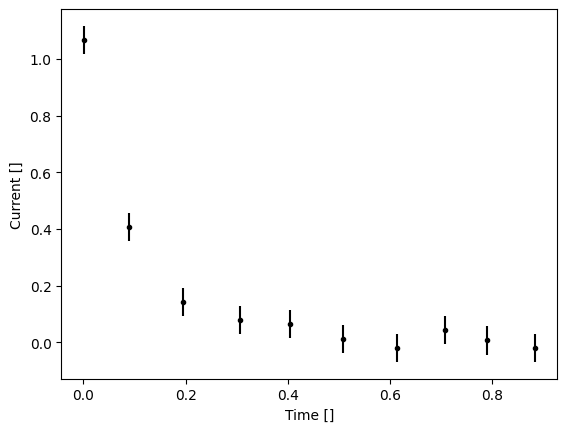

In [491]:
import matplotlib.pyplot as plt

plt.errorbar(
    data_frame['time'], 
    data_frame['current'], 
    data_frame['delta_current'], 
    ls='', 
    marker='.', 
    color='k'
)
plt.xlabel('Time []')
plt.ylabel('Current []')
plt.show()

Nun wollen wir die Messdaten mit Hilfe von `iminuit` fitten. Hierzu müssen wir zunächste zwei Module des packages importieren und eine Funktion für die Entladekurve des Kondensators definieren:

In [1]:
# Diese Zelle nur auf JupyterHub des ZDV ausführen um `iminuit` zu installieren!
# import sys
# import subprocess
# subprocess.check_call([
#     sys.executable, 
#     '-m',
#     'pip',
#     'install',
#     '--proxy',
#     'http://webproxy.zdv.uni-mainz.de:3128',
#     'iminuit'
# ])

In [492]:

from iminuit import Minuit, cost
import numpy as np

def discharge_current(t, I0, R, C):
    return I0 * np.exp(-t/(R*C))

Nun können wir den Fit selbst durchführen. Hierzu muss zuerst mittels dem `cost` Modul eine sogenannte Kostenfunktion erstellt werden. Die Kostenfunktion ist im Grunde unsere $\chi^2$ Funktion

$$ \chi^2 = \sum_i =\frac{(y_i – f(x_i, \theta))^2}{\Delta y_i^2}$$

welche minimiert werden soll. Dies ist bereits bei `iminuit` für uns vordefiniert. Anschließend können wir die genutzt Kostenfunktion über `Minuit` minimieren lassen. Hierzu müssen wir zunächst geeignete Startwerte für den Minimierungsprozess vorgeben. Diese sollten im Idealfall nicht allzu weit von den wahren Werten entfernt liegen. Wir werden an einem späteren Beispiel noch einmal genauer zeigen, wie man hier vorgehen kann. Um den Minimierungsprozess zu starten muss noch am Ende `migrad()` aufgerufen werden.

In [493]:
# Kostenfunktion:
ls = cost.LeastSquares(
    data_frame['time'],
    data_frame['current'], 
    data_frame['delta_current'], 
    discharge_current,
)

# Minimierung
mi = Minuit(ls,        # Kostenfunktion 
            I0=0.9,    # Startwerte
            R=10*10**3, 
            C=10**-6
           )
mi.migrad()
mi.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.707 (χ²/ndof = 0.4)      │              Nfcn = 103              │
│ EDM = 2.18e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ I0   │   1.07    │   0.05    │            │            │         │         │       │
│ 1 │ R    │  0.03e6   │  0.05e6   │            │            │         │         │       │
│ 2 │ C    │   3e-6    │   5e-6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────────────────────────────┐
│    │                I0                 R                 C │
├────┼───────────────────────────────────────────────────────┤
│ I0 │           0.00253          -34.4329         -3.448e-9 │
│  R │          -34.4329          2.25e+09 -224.599380820e-3 │
│  C │         -3.448e-9 -224.599380820e-3          2.25e-11 │
└────┴───────────────────────────────────────────────────────┘

Wie ihr seht gibt euch minuit euch vier verschiedene Objekte zurück. Für euch am wichtigsten ist die erste Tabelle, welche euch zeigt, ob euer Fit funktioniert hat. Im Allgemeinen gilt sind hier alle Felder grün hat euer Fit funktioniert, gelbe Felder können ein Problem andeuten müssen sie aber nicht und lila Felder bedeuten, dass etwas mit eurem Fit nicht in Ordnung ist. Die Bedeutungen der einzelnen Felder für unseren obigen Fit sind auch nochmal in der nachfolgenden Abbildung einzeln erklärt. Die Bedeutung der meisten Felder werden wir noch im laufe des Kurses kennen lernen. 

<figure class="image">
<img src="images/FitPerformance.png"  alt="{{Fit Performance }}" width=100%>
</figure>

Wie wir unserer Tabelle entnehmen können, gibt es also ein Problem mit unserem Fit. Um besser verstehen zu können, was das Problem sein könnte, wollen wir uns auch noch die anderen Outputs ansehen.

Die zweite Tabelle zeigt uns die bestimmten Werte für die Parameter in der Spalte `Value` und deren Unsicherheiten in der Spalte `Hess error`. Hierbei fällt auf, dass für unseren obigen Fit die Unsicherheiten der Parameter $R$ und $C$ größer sind als die bestimmten Werte selbst. 

Die dritte Tabelle ist die sogennnante **Kovarianzmatrix**. Die Kovarianzmatrix hat als Einträge auf ihrer **Hauptdiagonalen** die **Varianzen der entsprechenden Parameter** auf der **Nebendiagonalen** stehen die **Kovarianzen**. Der Wert in Klammern gibt die **Korrelation** zwischen den entspechenden Parametern an. Sind zwei Parameter stark **korreliert**, wird das entsprechende Feld **blau** dargestellt, bei einer **Antikorrelation** ist das Feld **rot**. 

Die letzte Ausgabe ist ein Plot unserer Messwerte zusammen mit der Fitfunktion basierend auf den Parametern des besten Fits. (Nur für neuere Version von `iminuit`)

Obwohl underser Fit unsere Messdaten gut widerspiegelt, scheint es ein Problem mit der Bestimmung einiger Parameter zu geben. Die große Unsicherheit in $R$ und $C$ deutet an, dass hier das Problem liegt. Um dies zu bestätigen, können wir uns einmal das reduzierte $\chi^2(x, I_0, R, C)$ als Funktion des entsprechenden Parameters von `iminuit` plotten lassen, während wir die anderen Parameter, so wie die x-Werte, konstant lassen. 

Für $I_0$ sieht das entsprechende Profil so aus:

c:\Users\Matthias\.venv\jupyter\lib\site-packages\iminuit\minuit.py:2579: IMinuitWarning: Specified nsigma bound, but error matrix is not accurate
  warnings.warn(


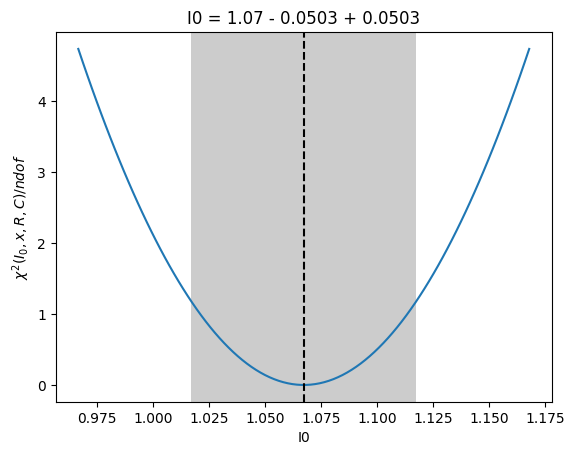

In [494]:
mi.draw_profile('I0')
plt.ylabel('$\chi^2(I_0, x, R, C)/ndof$')
plt.show()

Bei den anderen beiden Parametern ist dies nicht der Fall:

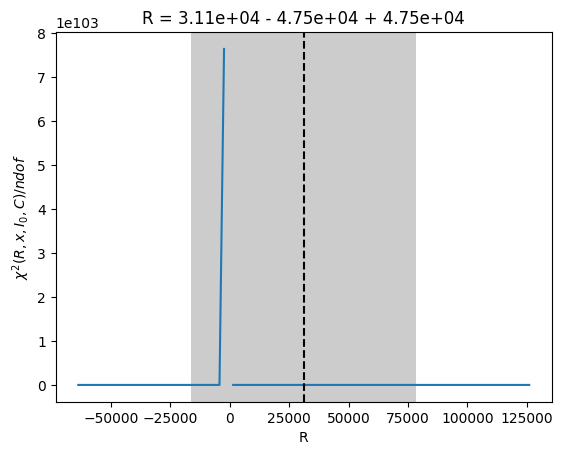

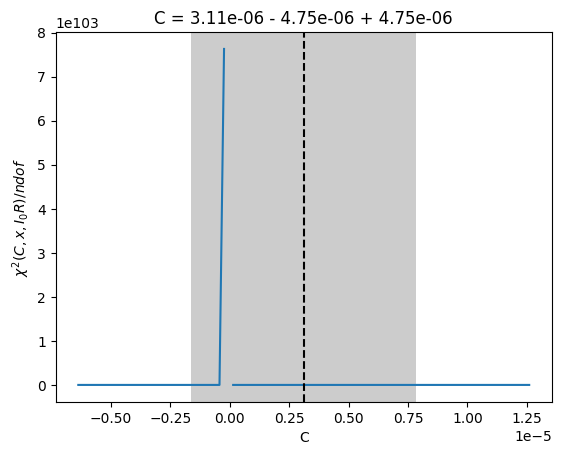

In [495]:
mi.draw_profile('R')
plt.ylabel('$\chi^2(R, x, I_0, C)/ndof$')
plt.show()

mi.draw_profile('C')
plt.ylabel('$\chi^2(C, x, I_0 R)/ndof$')
plt.show()

Das liegt daran, dass $R$ und $C$ vollständig korreliert sind. Reduziert `iminuit` $C$ um ein Faktor zwei, so wird dies dadurch kompensiert, dass das optimale Minimum verlangt, dass $R$ um einen Faktor zwei größer sein muss. Das heißt, es ist ohne weitere Information nicht möglich, $R$ und $C$ näher zu bestimmen, sondern lediglich das Produkt der beiden Größen.

Deshalb müssen wir in unserer Fitfunktion $R$ und $C$ durch die Zeitkonstante $\tau$ ersetzen und schreiben

$$ I = I_0 \exp\{-t/\tau\}$$

mit $\tau = R \cdot C$.

Führen wir nun erneut den Fit durch, so erhalten wir ein fehlerfreies Ergebnis...

In [496]:
#from iminuit import Minuit, cost

def discharge_current2(t, I0, tau):
    return I0 * np.exp(-t/tau)

ls = cost.LeastSquares(
    data_frame['time'],
    data_frame['current'], 
    data_frame['delta_current'], 
    discharge_current2
)
mi = Minuit(ls, I0=0.9, tau=0.3)
mi.migrad()
mi.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.707 (χ²/ndof = 0.3)      │              Nfcn = 97               │
│ EDM = 1.11e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ I0   │   1.07    │   0.05    │            │            │         │         │       │
│ 1 │ tau  │   0.097   │   0.011   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────────┐
│     │       I0      tau │
├─────┼───────────────────┤
│  I0 │  0.00254 -0.22e-3 │
│ tau │ -0.22e-3 0.000116 │
└─────┴───────────────────┘

... und die Werte und Fehler lassen sich über ...

In [497]:
mi.values['I0']

1.0670397937137222

... bzw. ...

In [498]:
mi.errors['I0']

0.050401508019580855

... für jeden Parameter auslesen. Dies lässt sich nun auch nutzen, um unsere Messwerte samt Fit in einem etwas schöneren Plot mit Achsenbeschriftungen darzustellen. Hierbei können wir ausnutzen, dass `iminuit` die Parameter in der Reihenfolge der Argumente unser definierten Fitfunktion speichert.

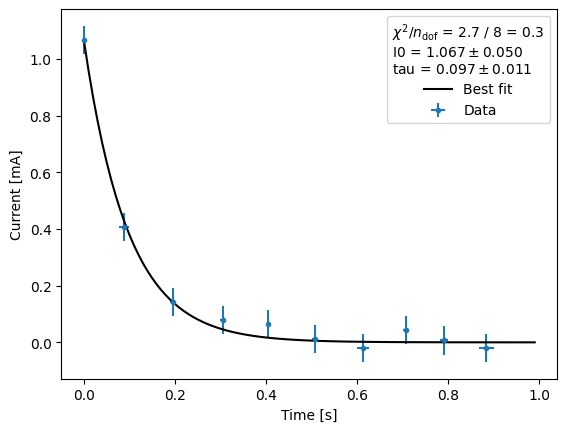

In [499]:
plt.errorbar(data_frame['time'], 
             data_frame['current'], 
             xerr=data_frame['delta_time'], 
             yerr=data_frame['delta_current'], 
             ls='', 
             marker='.',
             label='Data'
            )
x = np.arange(0, 1, 0.01)
plt.plot(x, 
         discharge_current2(x, *mi.values), # Sternchen operator zum entpacken der Werte
         color='k',
         label='Best fit'
        )
fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {mi.fval:.1f} / {mi.ndof:.0f} = {mi.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(mi.parameters, mi.values, mi.errors):
    fit_info.append(f"{p} = ${v:.3f} \pm {e:.3f}$")

plt.legend(title="\n".join(fit_info))
plt.ylabel('Current [mA]')
plt.xlabel('Time [s]')
plt.show()

# Mathematisch motivierte Herleitung des $\chi^2$-Fits:

Nach diesen anfänglichen Beispielen wollen wir uns eine semi-mathematische Herleitung des $\chi^2$-Fits angucken um etwas besser zu verstehen, warum diese Methode für uns in der Physik so wichtig ist. In unserem Grundpraktikum haben wir bereits gelernt, dass Messwerte durch Zufallszahlen $x_i$ repräsentiert werden und einer gewissen **Wahrscheinlichkeitsdichtefunktion (probability density function)** $f(x)$ unterliegen.

<figure class="image">
<img src="images/MaterialPythonkurs092018/PorbDensFun.png"  alt="{{ Beispiel PDF }}" width=70%>
</figure>


Eine **pdf** gibt an, mit welcher **Wahrscheinlichkeit ein Wert $x_i$** innerhalb eines **infinitesimalen Intervals $\text{d}x_i$** zu finden ist. Des Weiteren gilt, dass die Gesamtwahrscheinlichkeit gegeben ist durch $\int_S f(x) dx = 1$. 

Nun betrachten wir folgendes Beispiel: In unserem Labor messen wir genau drei mal die Raumtemperartur T. Auch hier gilt, dass unsere Messungen der einzelnen $T_i$ einer gewissen **Wahrscheinlichkeitsdichtefunktion** folgen. Betrachten Sie nun das folgende Bild; Welche **Wahrscheinlichkeitsdichtefunktion** passt besser zu den gezeigten Daten und **Warum?**

<figure class="image">
<img src="images/MaterialPythonkurs092018/ProbMaxTemp.png"  alt="{{ Beispiel PDF }}" width=100%>
</figure>

Die rechte Verteilung spiegelt unsere Messdaten besser wider. Dies können wir auch mathematisch ausdrücken. Für $N$ voreinander unabhängige Zufallszahlen bzw. Messpunkte (in unserem Beispiel $N = 3$) ist die Gesamtwahrscheinlichkeit gegeben durch das Produkt der einzelnen Wahrscheinlichkeitsdichten $f(x_i, \theta)$ multipliziert mit dem jeweiligen infinitesimalen Element $dx_i$

$$\prod_{i = 1}^{N} f(x_i,\theta) \  dx_i \text{   für alle } x_i \text{ in } [x_i, x_i + dx_i]$$

wobei $x_i$ in unserem Beispiel den Messpunkten $T_i$ und $f(x_i,\theta)$ unserer Gaussverteilung mit $\theta = (\mu, \sigma)$ entspricht. Sofern unsere Werte gut von der jeweiligen **Wahrscheinlichkeitsdichtefunktion** repräsentiert werden, d.h. wir die richtigen Parameter $\theta$ gewählt haben (wie im rechten oberen Plot), gilt 

$$ \prod_{i = 1}^{N} f(x_i,\theta)  dx_i \ \ \text{ist} \ \textbf{maximal.}$$

Da die einzelnen $dx_i$ von unseren Parametern $\theta$ unabhängig sind, gilt die gleiche Argumentation auch für 

$$ \mathcal{L}(x_1 ... x_N; \theta_1 ... \theta_N) = \prod_{i = 1}^{N} f(x_i,\theta)$$ 

wobei $\mathcal{L}(x_1 ... x_N; \theta_1 ... \theta_N)$ die sogenannte **"likelihood"** function darstellt.

Wie kommen wir nun von der **likelihood function** auf unsere **Methode der kleinsten Quadrate** und das Fitten einer Funktion $\lambda(x; \ $**$\phi$**$)$ an die gemessenen Punkte **$(x,y)$**? Dazu brauchen wir noch einen Zwischenschritt. Oftmals ist es einfacher, statt die **likelihood function** zu maximieren, die so genannte **log likelihood function**

$$ \log( \mathcal{L}(x_1 ... x_N; \theta_1 ... \theta_N)) = \sum_{i = 1}^{N} \log(f(x_i,\theta))$$

zu maximieren. Dies ist im Grunde das Gleiche, da der Logarithmus eine monoton-steigende Funktion ist. Auch in unserem Fall der **Methode der kleinsten Quadrate** benötigen wir die **log likelihood function**. 

Stellen Sie sich nun vor, wir haben eine Messung mit $N$ voneinander unabhängigen Messpunkten (x,y). Des Weiteren nehmen wir an, dass alle $x_i$ ohne Fehler sind und dass unsere $y_i$ gaußförmig um einen unbekannten wahren Wert $\lambda_i$ (sprich $\lambda_i$ entspricht dem Erwartungswert $\mu_i$ unserer Gaußverteilung) mit einer bekannten Varianz $\Delta y_i^2$ verteilt sind (Diese Annahme lässt sich mit dem zentralen Grenzwertsatz begründen, so lange der Fehler sich aus der Summe kleiner Fehler zusammensetzt). Die dazugehörige  **likelihood function** ist dann gegeben durch:

$$ \mathcal{L}(y_1 ... y_N; \lambda_1 ... \lambda_N, \Delta y_1 ... \Delta y_N)) = \prod_{i = 1}^{N}\frac{1}{\sqrt{2 \pi \Delta y_i^2}} \cdot \exp \bigg( \frac{ -(y_i - \lambda_i)^2}{2 \cdot \Delta y_i^2}\bigg)$$

Beziehungsweise die **log likelihood function** mit $\lambda_i = \lambda(x_i; \phi)$ ergibt sich zu

$$ \log(\mathcal{L}(y, \theta)) \approx -\frac{1}{2} \sum_{i = 1}^{N}\bigg( \frac{ (y_i - \lambda(x_i; \phi))^2}{\Delta y_i^2}\bigg)$$

wobei die konstanten Terme, welche nicht von unserer Funktion $\lambda(x_i; \phi)$ abhängen, vernachlässigt worden sind. Durch den Faktor $-\frac{1}{2}$ ist das Maximieren dieser **log likelihood function** gleich dem Minimieren von

$$ \chi(\phi_1 ... \phi_N)^2 = \sum_{i = 1}^{N} \frac{ (y_i - \lambda(x_i; \phi))^2}{\Delta y_i^2}$$

Diese Funktion ist unsere gesuchte **Methode der kleinsten Quadrate**. Mit ihrer Hilfe kann eine beliebige Funktion $\lambda(x; \phi)$, welche linear in ihren Parametern $\phi$ ist, an unsere Messdaten $(x,y\pm\Delta y)$ gefittet werden. Dabei stellt der Fitprozess selbst lediglich ein Minimierungsproblem dar. Im Folgenden sind unsere Annahmen noch einmal grafisch in einem Beispiel dargestellt.

<figure class="image">
<img src="images/MaterialPythonkurs092018/LeastSquare.png"  alt="{{ Least Square Beispiel }}" width=100%>
</figure>

Wie ein Algorithmus bei der Minimierung vorgeht, sprengt den Rahmen dieses Vorversuchs. Hier sei auf entsprechende Vorlesungen verwiesen. Aber um einen kleinen Einblick zu erhalten, kann man sich die Werte der Parameter und von $\chi^2$ für jeden Schritt ausgeben lassen. Dazu wird der Parameter `verbose` auf 1 gesetzt.

Man erkannt, dass für jeden Parameter zunächst separat geprüft wird, welche Änderung (größer oder kleiner) die Kostenfunktion minimiert. Danach beginnt die eigentliche Minimierung der Kostenfunktion durch den Algorithmus.

In [500]:
ls = cost.LeastSquares(data_frame['time'], data_frame['current'], data_frame['delta_current'], discharge_current, verbose=1)

mi = Minuit(ls, I0=0.9, R=10*10**3, C=10**-6)
mi.migrad()

(0.9, 10000.0, 1e-06) -> 99.20912665811522
(0.9000900000000001, 10000.0, 1e-06) -> 99.19412063461034
(0.89991, 10000.0, 1e-06) -> 99.22413838602546
(0.9002604809700815, 10000.0, 1e-06) -> 99.16571136645308
(0.8997395190299186, 10000.0, 1e-06) -> 99.25258973321158
(0.9, 10001.0, 1e-06) -> 99.2081333982375
(0.9, 9999.0, 1e-06) -> 99.21012010104333
(0.9, 10010.0, 1e-06) -> 99.19920228362008
(0.9, 9990.0, 1e-06) -> 99.21906933767059
(0.9, 10000.0, 1.0001e-06) -> 99.2081333982375
(0.9, 10000.0, 9.999e-07) -> 99.21012010104333
(0.9, 10000.0, 1.001e-06) -> 99.19920228362008
(0.9, 10000.0, 9.989999999999999e-07) -> 99.21906933767059
(1.1367992341436675, 15426.65629293471, 1.5426656292934658e-06) -> 71.48428998018905
(1.1639942960414291, 16049.877285679564, 1.6049877285679507e-06) -> 69.75101904460233
(1.308096945474447, 19352.234036123315, 1.9352234036123227e-06) -> 64.0373348681763
(1.377047580024234, 20932.354834379075, 2.093235483437897e-06) -> 65.47264288596953
(1.3083067929414927, 19352.2

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.707 (χ²/ndof = 0.4)      │              Nfcn = 87               │
│ EDM = 2.18e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ I0   │   1.07    │   0.05    │            │            │         │         │       │
│ 1 │ R    │  0.03e6   │  0.05e6   │            │            │         │         │       │
│ 2 │ C    │   3e-6    │   5e-6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────────────────────────────┐
│    │                I0                 R                 C │
├────┼───────────────────────────────────────────────────────┤
│ I0 │           0.00253          -34.3309         -3.459e-9 │
│  R │          -34.3309          2.25e+09 -224.592785048e-3 │
│  C │         -3.459e-9 -224.592785048e-3          2.25e-11 │
└────┴───────────────────────────────────────────────────────┘

__Zur Erinnerung__: die Methode der kleinsten Quadrate berücksichtigt nur Fehler in `y` aber nicht in `x`. Hierfür sind komplexere Methoden notwendig, die wir hier nicht betrachten wollen.
Ebenfalls wichtig ist, die Statusmeldungen von `iminuit` zu prüfen, d.h. eine <span style="color:yellow"> **gelbe** </span> Box zeigt an, das man sich Gedanken über das Ergebnis machen sollte (in unserem Fall, dass die Variablen $R$ und $C$ korreliert sind) und eine ,<span style="color:#7878FA"> **violette** </span> Box, dass der Fit nicht konvergiert ist und das Ergebnis nicht verwendet werden kann.